In [318]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [319]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types, plot_styles
from pathlib import Path

In [320]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

In [321]:
bender_submeters

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Datetime,,,,,,,,
2022-01-01 00:00:00,7.569785,0.576742,0.039946,0.585969,0.025802,1.261809,0.429955,0.052258
2022-01-01 00:30:00,6.771641,0.497238,0.041149,0.586528,0.025639,1.261356,0.432854,0.051954
2022-01-01 01:00:00,8.596677,0.554560,0.117282,0.585901,0.025691,1.260377,0.456698,0.051572
2022-01-01 01:30:00,7.786236,0.495641,0.039423,0.586005,0.025465,1.261335,0.423382,0.051665
2022-01-01 02:00:00,6.929411,0.558504,0.039517,0.586479,0.025546,1.263387,0.389958,0.051862
...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,9.456592,0.683685,0.037827,0.830455,0.025385,1.065136,0.388373,0.052078
2022-12-31 22:00:00,10.520131,0.559935,0.037847,0.830912,0.025454,1.065482,0.402404,0.052249
2022-12-31 22:30:00,8.988758,0.559554,0.037766,0.832230,0.025435,1.064953,0.405647,0.052079


### Data cleaner

Initialised with the data to be cleaned an a list of cleaners. The cleaners available are:

1. dp.OutlierRemover(method:str = 'iqr).datacleaner() - Only interquartile reange method currently in use.
2. dp.FillMissingData(func:str = 'rollingfill').datacleaner() - func can be rollingfill & meanfill. If rollingfill leaves NaN values mean is used.
3. dp.GenerateDatetime(start_date: datetime = datetime(2022, 1, 1), freq: str = '30T', periods: int = 48, tz: str = 'UTC') - applies datetime to your dataset.


In [322]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters, cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


### DataManip

Takes data & meta data and manipulates the data as requested.

In [323]:
metadata_dict = {'DB_11': {'Name': 'DB_11', 
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_11']},
                      'DB_3': {'Name': 'DB_3',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_3']},
                      'DB_4': {'Name': 'DB_4',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_4']},
                      'DB_5': {'Name': 'DB_5',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_5']},
                      'DB_6': {'Name': 'DB_6',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_6']},
                      'DB_9': {'Name': 'DB_9',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_9']},
                      'DB_10': {'Name': 'DB_10',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_10']},
                      'DB_12': {'Name': 'DB_12',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'Prefix': viz_enums.Prefix.KILO,
                                  'Type': viz_enums.DataType.FLOAT,
                                  'Legend': ['DB_12']},
                      viz_schema.MetaDataSchema.FRAME: {viz_schema.MetaDataSchema.FREQ: viz_schema.FrequencySchema.HH,
                                                        viz_schema.MetaDataSchema.GB_AGG: None, 
                                                        viz_schema.MetaDataSchema.INDEX_COLS: [viz_schema.FrequencySchema.DATETIME],
                                                        viz_schema.MetaDataSchema.GROUPED_COLS: []}}



In [324]:
meta_data = sdp.MetaData(metadata_dict)

new_test = sdp.DataManip(test.data, metadata=meta_data)

### DataViz

How plots will be generated.

In [325]:
viz_boi = visualize.DataViz(new_test.data, new_test.metadata, plot_styles.PlotlyPlot()) #MatPlotLibPlot() or PlotlyPlot() 
viz_boi.single_line_plot(['DB_11'])

In [326]:
grouped_class = new_test.groupby(viz_schema.GroupingKeySchema.WEEK_SEASON)
# datetime_schema.DateTimeSchema.WEEK    viz_schema.GroupingKeySchema.WEEK_SEASON
grouped_data: pd.DataFrame = grouped_class.data
grouped_meta: sdp.MetaData = grouped_class.metadata

             DB_11      DB_3      DB_4      DB_5      DB_6      DB_9  \
0.000000  1.700082  0.645084  0.297057  0.635163  0.023803  1.144233   
0.020833  1.909200  0.675231  0.296773  0.635254  0.024318  1.143230   
0.041667  1.511414  0.638778  0.296723  0.635167  0.024309  1.144225   
0.062500  1.599239  0.655879  0.296802  0.635145  0.024419  1.143791   
0.083333  1.401868  0.694576  0.296740  0.635219  0.024353  1.143732   
...            ...       ...       ...       ...       ...       ...   
6.895833  7.979490  0.627684  0.069185  0.622942  0.024808  1.201088   
6.916667  7.970836  0.645365  0.071343  0.623165  0.024760  1.201851   
6.937500  7.965739  0.672010  0.074174  0.623102  0.024926  1.201952   
6.958333  8.152764  0.623959  0.066804  0.623196  0.024851  1.199548   
6.979167  8.366535  0.636729  0.085593  0.623093  0.024941  1.200253   

             DB_10     DB_12  
0.000000  0.439777  0.236582  
0.020833  0.445070  0.236663  
0.041667  0.464479  0.236215  
0.062500  0

/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/My Drive/e2sviz/notebooks/../src/visualization/visualize.py:184: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



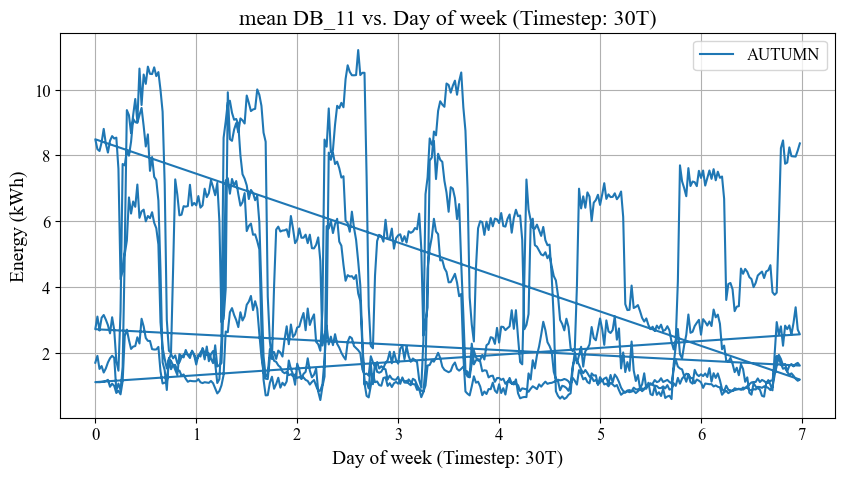

In [327]:
data_viz = visualize.DataViz(grouped_data, grouped_meta, plot_styles.MatPlotLibPlot())
data_viz.single_line_plot(['DB_11']) #MatPlotLibPlot() or PlotlyPlot()

In [328]:
viz_boi.correlation_plot()

In [329]:
viz_boi.bar_box_plot(bar=True)

In [330]:
viz_boi.pie_chart_plot()